# Tasca 6A: Visualització gràfica de múltiples variables

In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

pd.set_option('display.max_columns', None)

## Nivell 1
### Exercici 1
__Realitza la pràctica del punt 3.4 del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".__

<span style='color:blue; font-size:20px'> <b> Lectura de dades i descriptius </b> <span>

In [68]:
# Importació del dataset
tips = pd.read_csv('tips.csv', sep = ',', encoding = 'utf-8')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [69]:
# Nombre de files y de columnes del dataset
tips.shape

(244, 7)

In [70]:
# Tipus de variables
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [71]:
# Descriptiu de les variables numèriques
tips.describe().round(3)

,total_bill,tip,size
count,244.000,244.000,244.000
mean,19.786,2.998,2.570
std,8.902,1.384,0.951
min,3.070,1.000,1.000
25%,13.348,2.000,2.000
50%,17.795,2.900,2.000
75%,24.127,3.562,3.000
max,50.810,10.000,6.000


In [72]:
# Descriptiu de les variables categòriques
tips.describe(include='object')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [73]:
# Missings
(tips.isna().sum()) * 100 / tips.count()

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

<span style='color:blue; font-size:20px'> <b> Gràfics de múltiples variables </b> <span>

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

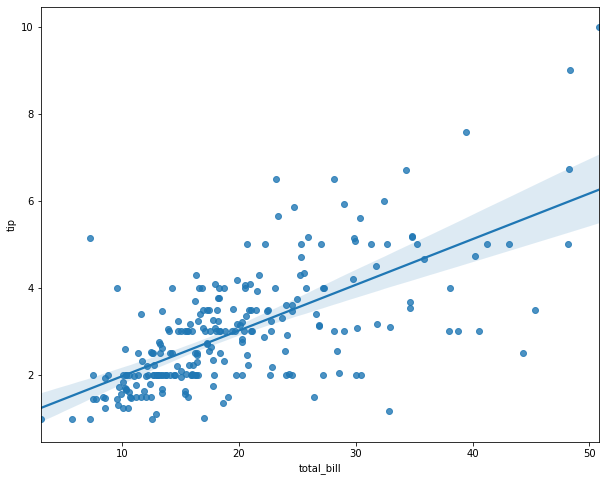

In [74]:
# Gràfic de dispersió total_bill vs tip
sns.regplot(x=tips.total_bill, y=tips.tip)

<span style='color:blue'> Existeix correlació lineal positiva entre la factura total i la propina. En general, la propina és més alta quan més elavada és la factura. </span>

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

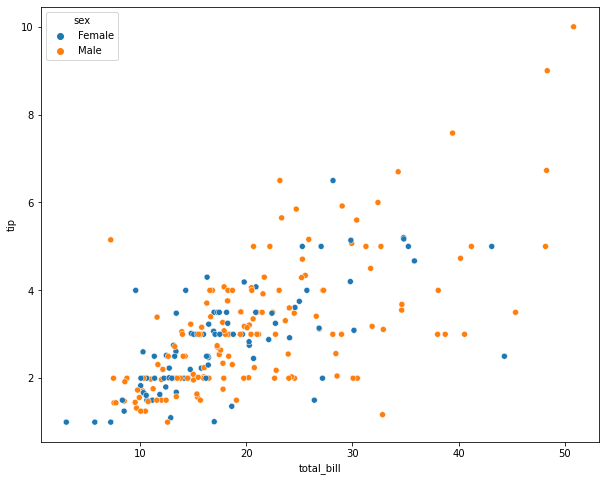

In [75]:
# Gràfic de dispersió total_bill vs tip agrupat per sex
sns.scatterplot(x=tips.total_bill, y=tips.tip, hue=tips.sex)

<span style='color:blue'> Sembla que no hi ha diferencies significatives en el sexe de la persona que paga la factura / deixa la propina. </span>

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

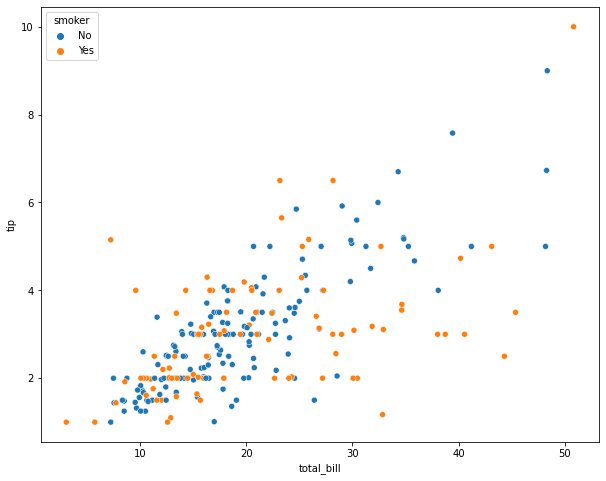

In [76]:
# Gràfic de dispersió total_bill vs tip agrupat per smoker
sns.scatterplot(x=tips.total_bill, y=tips.tip, hue=tips.smoker)

<span style='color:blue'> Tampoc hi ha diferencies significatives entre les persones que fumen i no fumen a l'hora de pagar la factura / deixar la propina. </span>

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

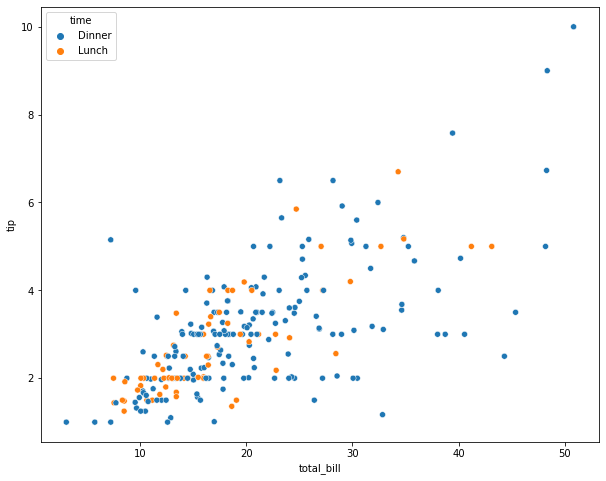

In [77]:
# Gràfic de dispersió total_bill vs tip agrupat per time
sns.scatterplot(x=tips.total_bill, y=tips.tip, hue=tips.time)

<span style='color:blue'> Tampoc hi ha diferencies significatives en el moment del dia a l'hora de pagar la factura / deixar la propina. </span>

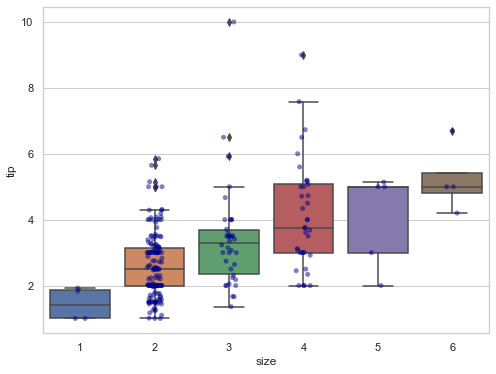

In [78]:
# Box plot de tip agrupat per size
sns.set(style="whitegrid", rc={'figure.figsize':(8,6)})
ax = sns.boxplot(x="size", y="tip", data=tips)
ax = sns.stripplot(x=tips['size'], y=tips['tip'], orient='v', color='darkblue', alpha= 0.5)

<span style='color:blue'> 
    <p> Existeix una relació positiva entre les propines i el nombre de comensals: a més comensals, més diners de propina es deixa. </p>
    <p> Es deixa més propina (nombre de vegades) quan es tracta de 2 comensals, i es deixa menys quan es tracta d'1 o 6. </p>
</span>

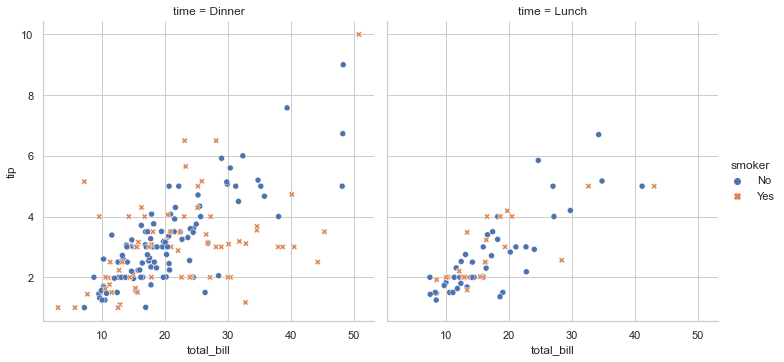

In [79]:
# Gràfic de dispersió total_bill vs tip agrupat per smoker i time
sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker", style="smoker", kind="scatter")

<span style='color:blue'> Sembla que no hi ha diferencies significatives respecte del moment del dia i si la persona fuma o no. </span>

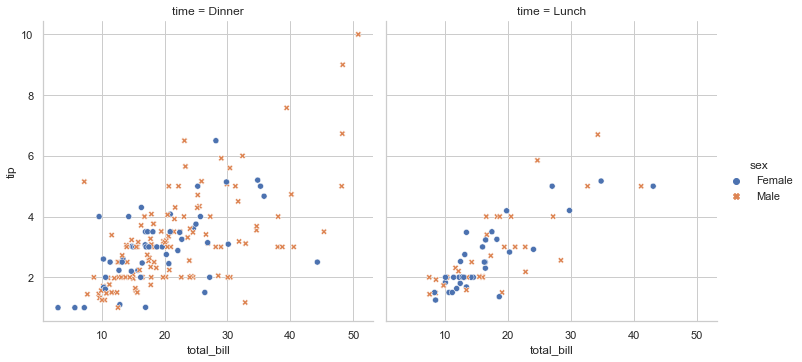

In [80]:
# Gràfic de dispersió total_bill vs tip agrupat per sex i time
sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="sex", style="sex", kind="scatter")

<span style='color:blue'> 
    <p> Sembla que no hi ha diferencies signficatives respecte del moment del dia i el sexe de la persona.  </p>
    <p> A l'hora de sopar, sembla que els homes paguen més que les dones, però a l'hora de dinar la cosa s'equilibra. </p>
</span>

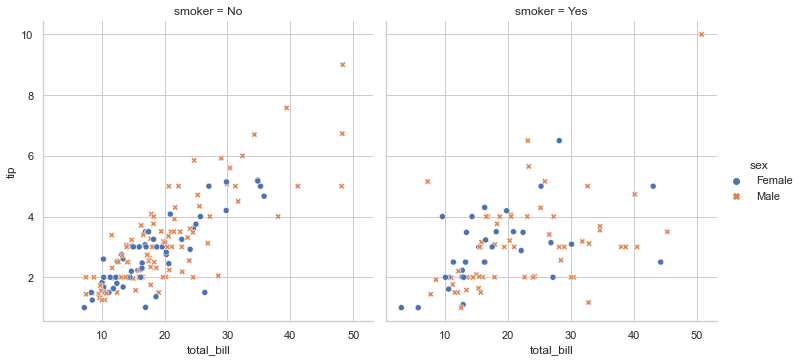

In [81]:
# Gràfic de dispersió total_bill vs tip agrupat per sex i smoker
sns.relplot(data=tips, x="total_bill", y="tip", col="smoker", hue="sex", style="sex", kind="scatter")

<span style='color:blue'> Quan es tracta de persones no fumadores, la correlació positiva entre la factura i la propina sembla ser més forta que no pas amb les personaes fumadores. </span>

## Nivell 2
### Exercici 2
__Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat__

<span style='color:blue; font-size:20px'> <b> Lectura de dades, tractament i descriptius </b> <span>

In [82]:
# Importació de les dades
df = pd.read_table('movies.dat', sep = '::', header = None)
movies = df.rename(columns={0:'ID',1:'Titol',2:'Genere'})
movies.head()

C:\Users\DeividK3\anaconda3\lib\site-packages\pandas\io\parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


,ID,Titol,Genere
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [83]:
# Missings
(movies.isna().sum()) * 100 / movies.count()

ID        0.0
Titol     0.0
Genere    0.0
dtype: float64

In [84]:
# Es crea la variable Any
Any = []

for x in movies.Titol:
    Any.append(x[-5:-1])
    
movies['Any'] = Any
movies.head()

,ID,Titol,Genere,Any
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [85]:
# Es creen tantes variables com gèneres hi ha. Aquestes variables seran dummies
tot_generes = []

for x in movies.Genere:
    tot_generes.extend(x.split('|'))
    
tot_generes[:8]

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 "Children's",
 'Fantasy',
 'Comedy',
 'Romance']

In [86]:
# Llista dels gèneres
generes = pd.unique(tot_generes)
generes

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [87]:
# Es crea una matriu de zeros amb tantes columnes com gèneres hi ha
cero_matriz = np.zeros((len(movies), len(generes)))
dummies = pd.DataFrame(cero_matriz, columns = generes)
dummies.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
# Per a cada observació s'asigna 1 en la columna que coincideix amb un dels gèneres de la pel·lícula
for i, gen in enumerate(movies.Genere):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1
    
dummies.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
# S'ajunten les taules
movies_d = movies.join(dummies)
movies_d.head()

,ID,Titol,Genere,Any,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,1995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# Compteig dels generes
movies_d.iloc[:,4:].sum()

Animation       105.0
Children's      251.0
Comedy         1200.0
Adventure       283.0
Fantasy          68.0
Romance         471.0
Drama          1603.0
Action          503.0
Crime           211.0
Thriller        492.0
Horror          343.0
Sci-Fi          276.0
Documentary     127.0
War             143.0
Musical         114.0
Mystery         106.0
Film-Noir        44.0
Western          68.0
dtype: float64

In [91]:
# Descriptiu de la variable Any
movies_d['Any'].describe()

count     3883
unique      81
top       1996
freq       345
Name: Any, dtype: object

<span style='color:blue'> En aquest data set apareixen més pel·lícules del 1996 que de la resta. </span>

<span style='color:blue; font-size:20px'> <b> Gràfics descriptius </b> <span>

<AxesSubplot:>

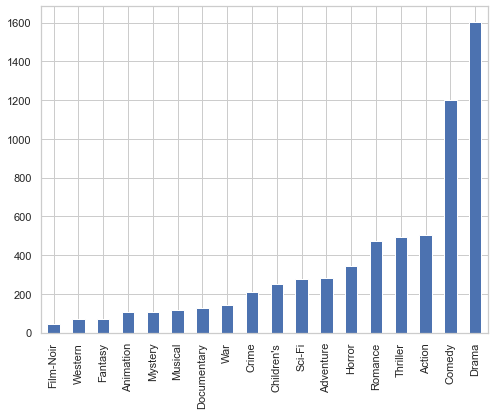

In [92]:
# Gràfic de barres del compteig de génere, ordenats de manera ascendent
movies_d.iloc[:,4:].sum().sort_values().plot.bar()

<span style='color:blue'> El gènere que menys apareix és Film_Noir i el que més el de Drama. </span>

In [93]:
# Es crea un dataframe que filtra les pel·lícules de 1995 i 1999
movies_9599 = movies_d[(movies_d.Any == '1995') | (movies_d.Any == '1999')]

In [94]:
# Es fa la suma del generes per any
movies_9599_sum = movies_9599.iloc[:,3:].groupby('Any').sum()
movies_9599_sum

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
Any,,,,,,,,,,,,,,,,,,
1995,8.0,22.0,89.0,25.0,4.0,50.0,158.0,45.0,18.0,43.0,16.0,18.0,22.0,12.0,4.0,8.0,1.0,4.0
1999,7.0,11.0,103.0,7.0,2.0,37.0,130.0,27.0,12.0,40.0,14.0,15.0,15.0,4.0,1.0,5.0,0.0,1.0


In [95]:
# Es transposa la taula
movies_9599_t = movies_9599_sum.transpose()
movies_9599_t

Any,1995,1999
Animation,8.0,7.0
Children's,22.0,11.0
Comedy,89.0,103.0
Adventure,25.0,7.0
Fantasy,4.0,2.0
Romance,50.0,37.0
Drama,158.0,130.0
Action,45.0,27.0
Crime,18.0,12.0
Thriller,43.0,40.0


<AxesSubplot:>

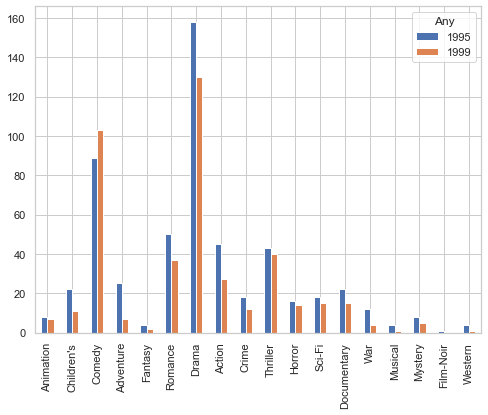

In [96]:
# El gràfic de barres diferenciat per Any
movies_9599_t.plot.bar()

## Nivel 3
### Exercici 3
__Mostra la teva creativitat amb el dataset "movies.dat" del exercici anterior.__

In [97]:
## Sèrie temporal dels 5 gèneres que més apareixen

# Suma dels gèneres per any
movies_sum = movies_d.iloc[:,3:].groupby('Any').sum()

# S'agafa els gèneres que més apareixen (gràfic anterior)
movies_filtro = movies_sum[['Drama','Comedy','Romance','Action','Thriller']][-20:]
movies_filtro.head()

,Drama,Comedy,Romance,Action,Thriller
Any,,,,,
1981,14.0,9.0,3.0,12.0,5.0
1982,21.0,12.0,2.0,7.0,3.0
1983,11.0,14.0,3.0,4.0,4.0
1984,23.0,17.0,6.0,11.0,6.0
1985,22.0,22.0,10.0,11.0,3.0


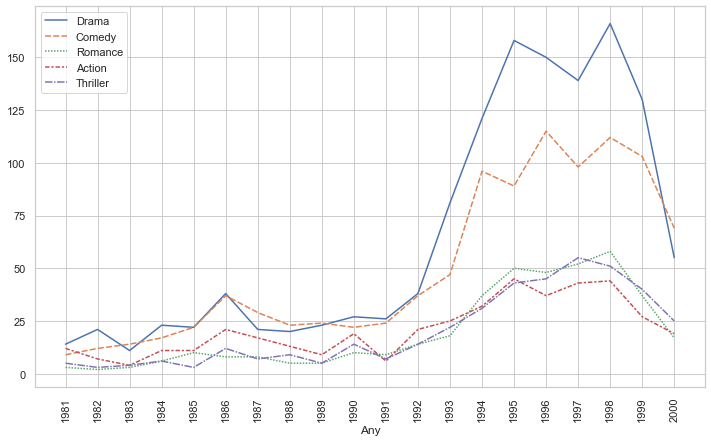

In [98]:
# Gràfic de sèrie temporal
plt.figure(figsize=(12,7))
sns.lineplot(data=movies_filtro)
plt.xticks(rotation=90)
plt.show()

<span style='color:blue'>
    <p> En general, el gènere de pel·lícula que més apareix cada any és el de Drama. </p>
    <p> En general, a partir de 1992 el nombre de pel·lícules estrenades ha crescut molt. </p>
    <p> Entre 1992 i 1995, el gènere de Comedia s'ha duplicat i el de Drama s'ha triplicat. </p>
</span>

In [99]:
from statsmodels.graphics.mosaicplot import mosaic

In [100]:
## Un altre gràfic: Mosaic plot

# Es crea una funció que, donat un dataframe i dos variables binaries, et retorna un mosaic plot
def mosaic_plot(df,gen1,gen2):
    plt.rcParams["figure.figsize"]=(10, 8)
    mosaic(df,[gen1,gen2])
    plt.show()

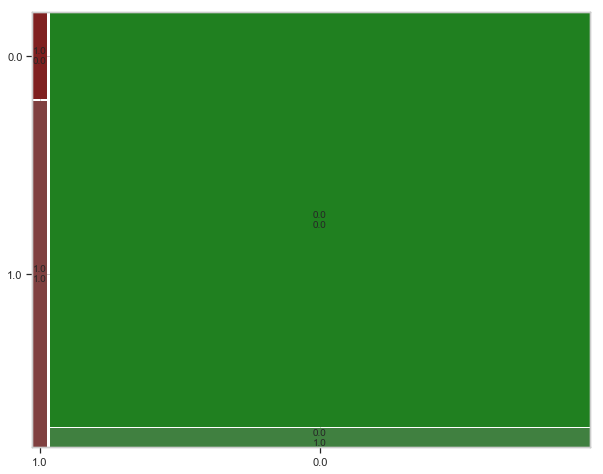

In [101]:
# Mosaic plot de Animation vs Children's
mosaic_plot(movies_d,"Animation","Children's")

In [102]:
# Es crea una taula de contingència per respaldar el gràfic
pd.crosstab(movies_d["Animation"],movies_d["Children's"])

Children's,0.0,1.0
Animation,,
0.0,3611,167
1.0,21,84


<span style='color:blue'>
    <p>Interpretació: eix horitzontal Animation, eix vertical Children's </p>
    <p>(0,0): Les pel·lícules que NO son d'animació ni per a nens representen un alt percentatge de les pel·lícules totals.</p> 
    <p>Children's = 1: Les pel·lícules d'animació representen un baix percentatge (33%) de les pel·lícules per a nens.</p>
    <p>Animation = 1: Les pel·lícules per a nens representen un alt percentatge (80%) de les pel·lícules d'animació.</p>
</span>

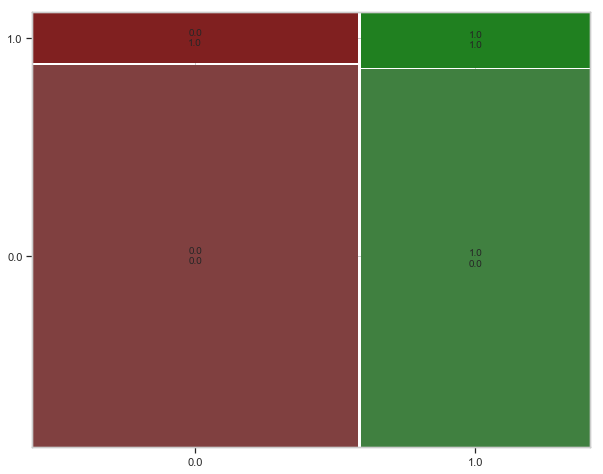

In [103]:
# Mosaic plot de Drama vs Romance
mosaic_plot(movies_d,"Drama","Romance")

In [104]:
# Es crea una taula de contingència per respaldar el gràfic
pd.crosstab(movies_d["Drama"],movies_d["Romance"])

Romance,0.0,1.0
Drama,,
0.0,2013,267
1.0,1399,204


<span style='color:blue'>
    <p>Interpretació: eix horitzontal Drama, eix vertical Romance </p>
    <p>Romance = 0: Les pel·lícules de Drama representen un 33% del total de pel·lícules.</p> 
    <p>Romance = 1: Les pel·lícules de drama representen quasi la meitat de les pel·lícules d'amor. </p>
</span>